# Hello covolutional AutoEncoder for FMNIST dataset

In [1]:
# Prerequisites
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print("Python Version: ", sys.version)
print("Numpy Version: ", np.__version__)
print("Pandas Version: ", pd.__version__)
print("TensorFlow Version: ", tf.__version__)

Python Version:  3.12.7 (tags/v3.12.7:0b05ead, Oct  1 2024, 03:06:41) [MSC v.1941 64 bit (AMD64)]
Numpy Version:  2.0.2
Pandas Version:  2.2.3
TensorFlow Version:  2.18.0


### Get Fashion MNIST Dataset

In [2]:
# Get dataset and split into training, validation, and test sets
f_mnist = keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = f_mnist
X_train_full = X_train_full.astype(np.float32) / 255
X_test = X_test.astype(np.float32) / 255
X_train, X_val = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_val = y_train_full[:-5000], y_train_full[-5000:]

### Build and train the Convolutional AutoEncoder

In [ ]:
tf.random.set_seed(42) 

ae_conv_encoder = keras.Sequential([
    layers.Reshape([28, 28, 1]),
    layers.Conv2D(16, 3, padding="same", activation="relu"),
    layers.MaxPool2D(pool_size=2),  # output: 14 × 14 x 16
    layers.Conv2D(32, 3, padding="same", activation="relu"),
    layers.MaxPool2D(pool_size=2),  # output: 7 × 7 x 32
    layers.Conv2D(64, 3, padding="same", activation="relu"),
    layers.MaxPool2D(pool_size=2),  # output: 3 × 3 x 64
    layers.Conv2D(30, 3, padding="same", activation="relu"),
    layers.GlobalAvgPool2D()  # output: 30
])
ae_conv_decoder = keras.Sequential([
    layers.Dense(3 * 3 * 16),
    layers.Reshape((3, 3, 16)),
    layers.Conv2DTranspose(32, 3, strides=2, activation="relu"),
    layers.Conv2DTranspose(16, 3, strides=2, padding="same", activation="relu"),
    layers.Conv2DTranspose(1, 3, strides=2, padding="same"),
    layers.Reshape([28, 28])
])
ae_conv = keras.Sequential([ae_conv_encoder, ae_conv_decoder])

ae_conv.compile(loss="mse", optimizer="nadam")                 


In [5]:
ae_conv.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_2 (Sequential)       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_3 (Sequential)       │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Note X_train used for both inputs and targets, same for validation data
history = ae_conv.fit(X_train, X_train, epochs=10, validation_data=(X_val, X_val))

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: 0.0459 - val_loss: 0.0209
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.0198 - val_loss: 0.0178
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.0170 - val_loss: 0.0160
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.0157 - val_loss: 0.0150
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.0148 - val_loss: 0.0144
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.0141 - val_loss: 0.0140
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.0136 - val_loss: 0.0140
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.0132 - val_loss: 0.0136
Epoch 9/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.0129 - val_loss: 0.0133
Epoch 10/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.0126 - val_loss: 0.0131


In [7]:
ae_conv.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_2 (Sequential)       │ (None, 30)             │        40,606 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_3 (Sequential)       │ (None, 28, 28)         │        13,873 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 163,440 (638.44 KB)

 Trainable params: 54,479 (212.81 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 108,961 (425.63 KB)

### Visualize Reconstruction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


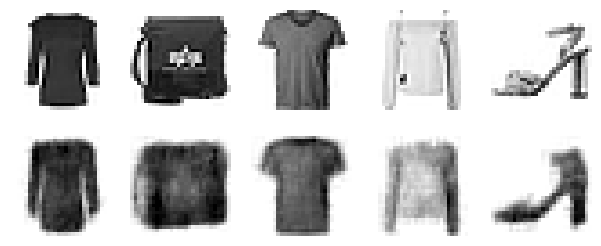

In [8]:
def viz_reconstructions(model, images=X_val, n_images=5):
    reconstruct = np.clip(model.predict(images[:n_images]), 0, 1)
    fig = plt.figure(figsize=(n_images * 1.5, 3))
    for image_index in range(n_images):
        plt.subplot(2, n_images, 1 + image_index)
        plt.imshow(images[image_index], cmap="binary")
        plt.axis("off")
        plt.subplot(2, n_images, 1 + n_images + image_index)
        plt.imshow(reconstruct[image_index], cmap="binary")
        plt.axis("off")

viz_reconstructions(ae_conv)
plt.show()